# Working with APIs

In this notebook we will work with YELP API as an example of collecting data from an application programming interface, API.

In order to follow these steps you will need to have your own API key.

* Generate Yelp API Key (you need to have a YELP account): https://www.yelp.com/developers/v3/manage_app

In [1]:
# Import packages
import requests
import pandas as pd
import json

In [ ]:
api_url = "https://api.yelp.com/v3/businesses/search"

In [ ]:
#@title Replace your own API Key here { run: "auto", vertical-output: true, display-mode: "form" }
api_key = "" #@param {type:"string"}

In [ ]:
# Set up parameter dictionary according to documentation
params = {"term": "cafe",
          "location": "Boston"}

# Set up header dictionary w/ API key according to documentation
headers = {"Authorization": "Bearer {}".format(api_key)}

In [ ]:
# Call the API
response = requests.get(api_url,
                        params=params,
                        headers=headers)

In [ ]:
# Isolate the JSON data from the response object
data = response.json()

# Load data to a data frame
cafes = pd.DataFrame(data["businesses"])

cafes.head(2)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,e4r0wRKY_iNdmDffnV0ntw,ogawa-coffee-boston-2,Ogawa Coffee,https://s3-media4.fl.yelpcdn.com/bphoto/KhV3Kt...,False,https://www.yelp.com/biz/ogawa-coffee-boston-2...,550,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.0,"{'latitude': 42.3568572843331, 'longitude': -7...",[delivery],$$,"{'address1': '10 Milk St', 'address2': '', 'ad...",+16177807139,(617) 780-7139,1474.820314
1,06feX4qEHFMcPZsiWtvYfw,thinking-cup-boston-5,Thinking Cup,https://s3-media2.fl.yelpcdn.com/bphoto/QKyY2_...,False,https://www.yelp.com/biz/thinking-cup-boston-5...,780,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.5,"{'latitude': 42.351734691006, 'longitude': -71...",[delivery],$$,"{'address1': '85 Newbury St', 'address2': '', ...",+16172473333,(617) 247-3333,516.679758


In [ ]:
cafes.shape

(20, 16)

In [ ]:
for id in cafes.id:
  url="https://api.yelp.com/v3/businesses/" + id + "/reviews"
  req = requests.get(url, headers=headers)
  data = response.json()
  df = pd.DataFrame(data["businesses"])
  df.head(1)

In [ ]:
url="https://api.yelp.com/v3/businesses/" + cafes.id[0] + "/reviews"
response = requests.get(url, headers=headers)
data = response.json()

In [ ]:
pd.DataFrame(data['reviews'])

,id,url,text,rating,time_created,user
0,QKA8U45o2FznkhUgSOXkbg,https://www.yelp.com/biz/ogawa-coffee-boston-2...,Picture this. You're finally walking around on...,5,2020-01-03 11:46:05,"{'id': 'e1E55pOcV2TDtZJMZyA6aA', 'profile_url'..."
1,AEh7fYiiKFMsCd6UcdFJPQ,https://www.yelp.com/biz/ogawa-coffee-boston-2...,Went to Ogawa bright and early (I'm talking 7:...,2,2020-01-31 17:07:48,"{'id': 'FTNlMGxVV2KZh4qjCLYuEQ', 'profile_url'..."
2,NYbzPadzOdjqE65ahKJ7-Q,https://www.yelp.com/biz/ogawa-coffee-boston-2...,This review is just based on a 1-time visit (b...,4,2020-01-09 10:29:00,"{'id': '7bb1FK71jF-I2DKI45gpnw', 'profile_url'..."


## Yahoo Finance

In [2]:
import yfinance as yf

#define the ticker symbol
symbol = 'BABA'

#get data on this ticker
tickerData = yf.Ticker(symbol)

#get the historical prices for this ticker
tickerDF = tickerData.history(period='1d', start='2010-1-1')

#see your data
tickerDF

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-19 00:00:00-04:00,91.470390,98.377539,88.756867,92.644608,271879400,0.0,0.0
2014-09-22 00:00:00-04:00,91.470395,91.717079,88.312844,88.697670,66657800,0.0,0.0
2014-09-23 00:00:00-04:00,87.760267,89.279840,85.471040,86.013741,39009800,0.0,0.0
2014-09-24 00:00:00-04:00,87.296501,89.368645,86.063082,89.368645,32088000,0.0,0.0
2014-09-25 00:00:00-04:00,89.881746,90.286312,87.326105,87.740532,28598000,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-27 00:00:00-04:00,70.889999,71.690002,70.583000,71.589996,13281300,0.0,0.0
2024-03-28 00:00:00-04:00,72.080002,72.589996,72.055000,72.360001,14073400,0.0,0.0
2024-04-01 00:00:00-04:00,73.239998,73.582001,72.809998,73.370003,14311700,0.0,0.0


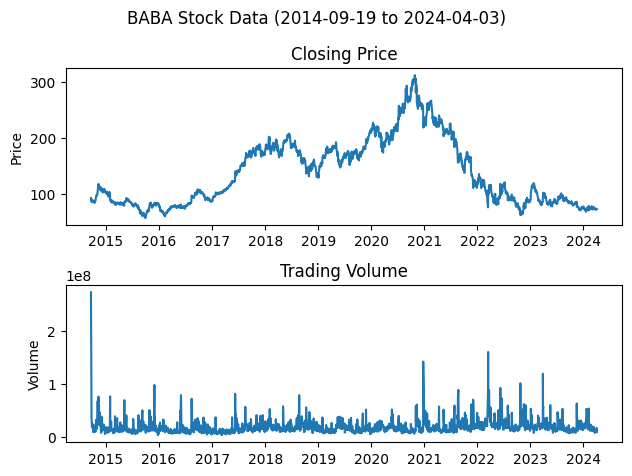

In [4]:
import matplotlib.pyplot as plt

# Create the first panel and set the current axis
plt.subplot(2, 1, 1)  # (rows, columns, panel number)
plt.plot(tickerDF['Close'])
plt.title('Closing Price')  # Add title for the first plot
plt.ylabel('Price')  # Add y-axis label

# Create the second panel and set the current axis
plt.subplot(2, 1, 2)
plt.plot(tickerDF['Volume'])
plt.title('Trading Volume')  # Add title for the second plot
plt.ylabel('Volume')  # Add y-axis label

# Add a main title to the chart
plt.suptitle(f'{symbol} Stock Data ({str(tickerDF.index.min().date())} to {str(tickerDF.index.max().date())})')  # This will add a title at the top of the figure

# Adjust layout to prevent overlap
plt.tight_layout(pad=1.0);